# Data Management Classroom - Getting Started

Welcome to the Data Management Classroom! This notebook demonstrates the basic functionality of your environment.

## Environment Overview
- **Database**: PostgreSQL 13 with passwordless local access
- **Python**: Data science packages (pandas, numpy, matplotlib, seaborn, scikit-learn)
- **VS Code**: Integrated development environment with notebook support
- **Sample Data**: Pre-loaded CSV and database examples

## 1. Import Required Libraries

Let's start by importing the essential libraries for data analysis.

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📊 Pandas version: 2.3.0
🔢 NumPy version: 2.2.6


## 2. Database Connection

Connect to the PostgreSQL database and explore the sample data.

In [2]:
# Database connection using SQLAlchemy (recommended for pandas)
engine = create_engine('postgresql://vscode@localhost:5432/vscode')

# Test connection
try:
    with engine.connect() as conn:
        result = conn.execute("SELECT version()")
        version = result.fetchone()[0]
        print(f"✅ Connected to: {version[:50]}...")
except Exception as e:
    print(f"❌ Connection failed: {e}")

❌ Connection failed: (psycopg2.OperationalError) connection to server at "localhost" (::1), port 5432 failed: FATAL:  role "vscode" does not exist

(Background on this error at: https://sqlalche.me/e/20/e3q8)


## 3. Load and Explore Data

Let's load data from both the CSV file and the database.

In [8]:
# Load CSV data
csv_data = pd.read_csv('/workspaces/data-management-classroom/data/raw/sample.csv')
print("📁 CSV Data:")
print(csv_data.head())
print(f"\nDataset shape: {csv_data.shape}")

📁 CSV Data:
   id           name  age   department  salary
0   1  Alice Johnson   28  Engineering   75000
1   2      Bob Smith   35    Marketing   65000
2   3    Carol Davis   42  Engineering   85000
3   4   David Wilson   29        Sales   55000
4   5      Eve Brown   31    Marketing   60000

Dataset shape: (5, 5)


In [4]:
# Load database data
try:
    db_data = pd.read_sql("SELECT * FROM employees", engine)
    print("🗄️ Database Data:")
    print(db_data)
except Exception as e:
    print(f"ℹ️ No employees table found: {e}")
    print("Run the quickstart script first: python3 scripts/quickstart.py")

ℹ️ No employees table found: (psycopg2.OperationalError) connection to server at "localhost" (::1), port 5432 failed: FATAL:  role "vscode" does not exist

(Background on this error at: https://sqlalche.me/e/20/e3q8)
Run the quickstart script first: python3 scripts/quickstart.py


## 4. Data Analysis

Perform basic data analysis and visualization.

In [9]:
# Basic statistics
print("📊 Data Summary:")
print(csv_data.describe())

# Department analysis
dept_summary = csv_data.groupby('department').agg({
    'salary': ['mean', 'count'],
    'age': 'mean'
}).round(2)

print("\n🏢 Department Summary:")
print(dept_summary)

📊 Data Summary:
             id        age        salary
count  5.000000   5.000000      5.000000
mean   3.000000  33.000000  68000.000000
std    1.581139   5.700877  12041.594579
min    1.000000  28.000000  55000.000000
25%    2.000000  29.000000  60000.000000
50%    3.000000  31.000000  65000.000000
75%    4.000000  35.000000  75000.000000
max    5.000000  42.000000  85000.000000

🏢 Department Summary:
              salary         age
                mean count  mean
department                      
Engineering  80000.0     2  35.0
Marketing    62500.0     2  33.0
Sales        55000.0     1  29.0


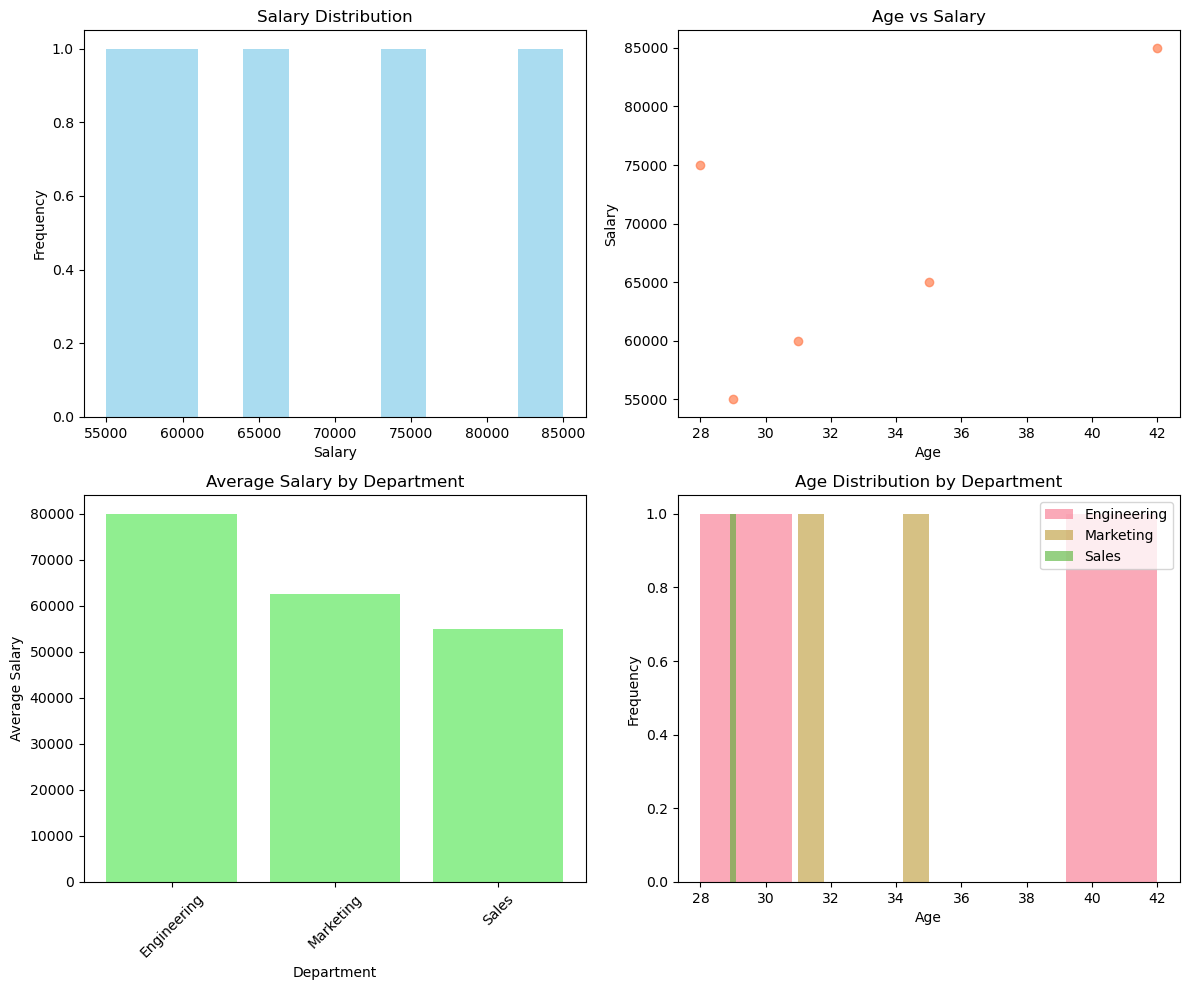

📈 Visualizations created successfully!


In [10]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Salary distribution
axes[0, 0].hist(csv_data['salary'], bins=10, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Salary Distribution')
axes[0, 0].set_xlabel('Salary')
axes[0, 0].set_ylabel('Frequency')

# Age vs Salary scatter plot
axes[0, 1].scatter(csv_data['age'], csv_data['salary'], alpha=0.7, color='coral')
axes[0, 1].set_title('Age vs Salary')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Salary')

# Department salary comparison
dept_salaries = csv_data.groupby('department')['salary'].mean()
axes[1, 0].bar(dept_salaries.index, dept_salaries.values, color='lightgreen')
axes[1, 0].set_title('Average Salary by Department')
axes[1, 0].set_xlabel('Department')
axes[1, 0].set_ylabel('Average Salary')
axes[1, 0].tick_params(axis='x', rotation=45)

# Age distribution by department
for dept in csv_data['department'].unique():
    dept_ages = csv_data[csv_data['department'] == dept]['age']
    axes[1, 1].hist(dept_ages, alpha=0.6, label=dept, bins=5)
axes[1, 1].set_title('Age Distribution by Department')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("📈 Visualizations created successfully!")

## 5. Database Operations

Demonstrate how to work with the PostgreSQL database.

In [11]:
# Create a new table from our CSV data
try:
    csv_data.to_sql('employees_csv', engine, if_exists='replace', index=False)
    print("✅ CSV data uploaded to database as 'employees_csv' table")
    
    # Query the new table
    result = pd.read_sql("SELECT department, AVG(salary) as avg_salary FROM employees_csv GROUP BY department ORDER BY avg_salary DESC", engine)
    print("\n💰 Average Salary by Department (from database):")
    print(result)
    
except Exception as e:
    print(f"❌ Database operation failed: {e}")

❌ Database operation failed: (psycopg2.OperationalError) connection to server at "localhost" (::1), port 5432 failed: FATAL:  role "vscode" does not exist

(Background on this error at: https://sqlalche.me/e/20/e3q8)


## 6. Next Steps

You now have a fully functional data management environment! Here are some next steps:

1. **Explore the workspace structure**:
   - `data/raw/` - Place your raw data files here
   - `data/processed/` - Save cleaned and processed data
   - `notebooks/` - Create analysis notebooks
   - `scripts/` - Write Python scripts for data processing

2. **Database management**:
   - Use VS Code's PostgreSQL extensions for database exploration
   - Create tables, views, and stored procedures
   - Practice SQL queries

3. **Data analysis**:
   - Import your own datasets
   - Create data cleaning pipelines
   - Build machine learning models
   - Generate reports and visualizations

4. **Useful commands**:
   - `python3 scripts/quick_check.sh` - Verify environment
   - `python3 scripts/quickstart.py` - Run demo
   - `psql -h localhost -U vscode -d vscode` - Connect to database

Happy data analysis! 🎉